In this notebook, we will
- load already trained models from the directory
- predict Ered of molecules in the test dataset
- compare the errors (R2 and RMSE) of models

In [26]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

# import custom functions from the python file
import sys
sys.path.append('../') # path of the directory that contains Chemfunctions.py
import Chemfunctions as chemfun


# Plots
import matplotlib.pyplot as plt
import seaborn as sns

# RDKit 
import rdkit.Chem as Chem

import pickle

In [27]:
LR_model = pickle.load(open(r'./Models/LinearRegression.sav','rb'))
SVR_model = pickle.load(open(r'./Models/SVRegression.sav','rb'))
GBR_model = pickle.load(open(r'./Models/GBRegression.sav','rb'))

In [28]:
X_train = pd.read_csv(r'./Data/X_train_70pc_scaled.csv')
X_test = pd.read_csv(r'./Data/X_test_30pc_scaled.csv')
y_train = pd.read_csv(r'./Data/y_train_70pc_target.csv')
y_test = pd.read_csv(r'./Data/y_test_30pc_target.csv')

In [29]:
import tensorflow as tf
NN_model =  tf.keras.models.load_model(r'./Models/NN_Regression.h5')
NN_dp_model = tf.keras.models.load_model(r'./Models/NN_with_dropout_Regression.h5')

In [30]:
test_x = pd.read_csv(r'./Data/X_test_30pc_scaled_nn.csv')
test_y = y_train

train_x = pd.read_csv(r'./Data/X_train_70pc_90v_scaled_nn.csv')
train_y = pd.read_csv(r'./Data/y_train_70pc_90v_scaled_nn.csv')

In [31]:
import importlib
importlib.reload(chemfun)

<module 'Chemfunctions' from '..\\Chemfunctions.py'>

Comparison of 5 models

In [54]:
def model_errors(model,X_train,X_test,y_train,y_test):
    
    ytest_pred=model.predict(X_test)

    ytrain_pred=model.predict(X_train)
    
    ytrain_pred=np.array(ytrain_pred).reshape(-1,1)
    ytest_pred=np.array(ytest_pred).reshape(-1,1)
    y_test=np.array(y_test).reshape(-1,1)
    y_train=np.array(y_train).reshape(-1,1)

    from sklearn.metrics import mean_squared_error as mse
    from sklearn.metrics import r2_score as r2

    r2_train= round(r2(y_true=y_train,y_pred=ytrain_pred),2)
    rmse_train = round(np.sqrt(mse(y_true=y_train,y_pred=ytrain_pred)),2)

    r2_test= round(r2(y_true=y_test,y_pred=ytest_pred),2)
    rmse_test = round(np.sqrt(mse(y_true=y_test,y_pred=ytest_pred)),2)
    return r2_train,r2_test,rmse_train,rmse_test


In [58]:
r2_score_train=[]
rmse_score_train=[]
r2_score_test=[]
rmse_score_test=[]
models=[LR_model,SVR_model,GBR_model,NN_model,NN_dp_model]
# model_name=[]
# for mod in 
for mods in models:
    if mods in [LR_model,SVR_model,GBR_model]:
        r2,r2_,rmse,rmse_=model_errors(model=mods,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
    else:
        r2,r2_,rmse,rmse_=model_errors(model=mods,X_train=train_x,X_test=test_x,y_train=train_y,y_test=y_test)
    # model_name.append(mods)
    r2_score_train.append(r2)
    rmse_score_train.append(rmse)

    r2_score_test.append(r2_)
    rmse_score_test.append(rmse_)



108/108 [==============================] - 0s 676us/step


In [65]:
model_name=["LR","SVR","GBR","NN","NN_dp"]
df=pd.DataFrame({"Model":model_name,"r2_score_train":r2_score,"rmse_score_train":rmse_score,"r2_score_test":r2_score_test,"rmse_score_test":rmse_score_test})
df

,Model,r2_score_train,rmse_score_train,r2_score_test,rmse_score_test
0,LR,0.80,0.08,0.79,0.08
1,SVR,0.84,0.07,0.79,0.08
2,GBR,0.84,0.07,0.80,0.08
3,NN,0.88,0.06,0.80,0.08
4,NN_dp,0.81,0.08,0.79,0.08


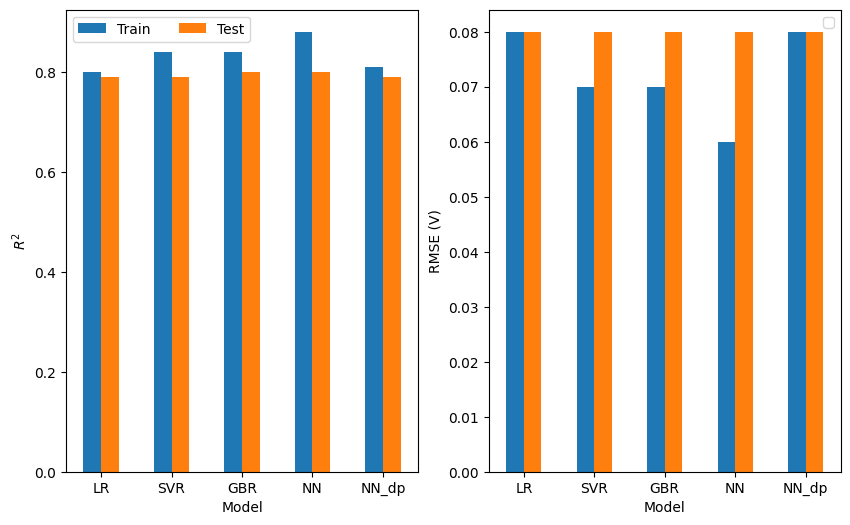

In [77]:
fig,ax=plt.subplots(1,2,figsize=(10,6),sharex=True)
df[["Model","r2_score_train","r2_score_test"]].set_index("Model").plot(kind="bar",rot=0,ax=ax[0])
ax[0].legend(["Train","Test"],ncol=2)
df[["Model","rmse_score_train","rmse_score_test"]].set_index("Model").plot(kind="bar",rot=0,ax=ax[1])
ax[1].legend([])
ax[1].set_ylabel("RMSE (V)")
ax[0].set_ylabel("$R^2$")
plt.show()


- Least overfitting in the LR
- NN overfit the data compared to NN_dp (dropout regularization helped)
- SVR, GBR, and NNs overfit data compared to the LR
- comparable performance of 5 models on the test data
- LR should be sufficient to predict the ERed

1. Linear Regression model

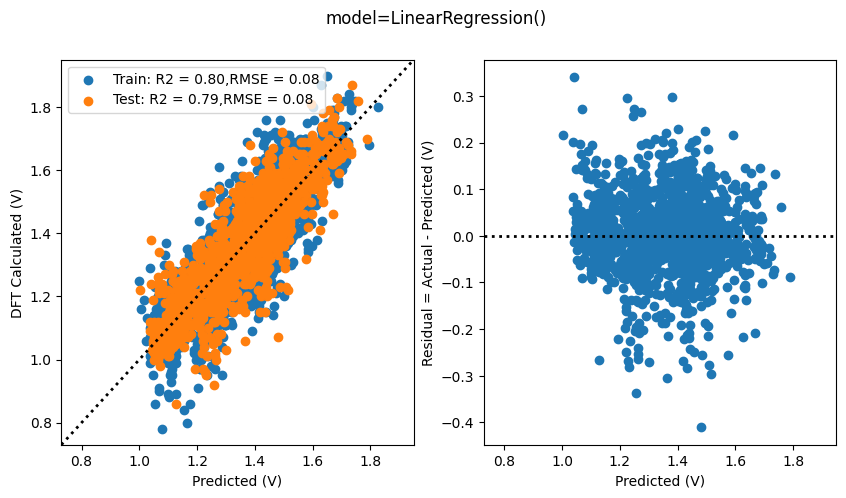

In [32]:
chemfun.pairity_plot(model=LR_model,X_train=X_train,X_test=X_test,y_train=y_train["ERed"],y_test=y_test["ERed"])

2. Support Vector Regression

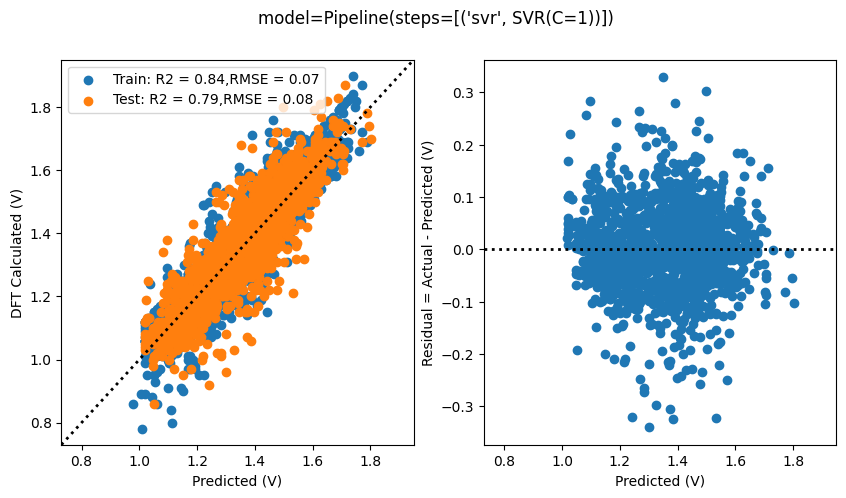

In [33]:
chemfun.pairity_plot(model=SVR_model,X_train=X_train,X_test=X_test,y_train=y_train["ERed"],y_test=y_test["ERed"])

3. GBR

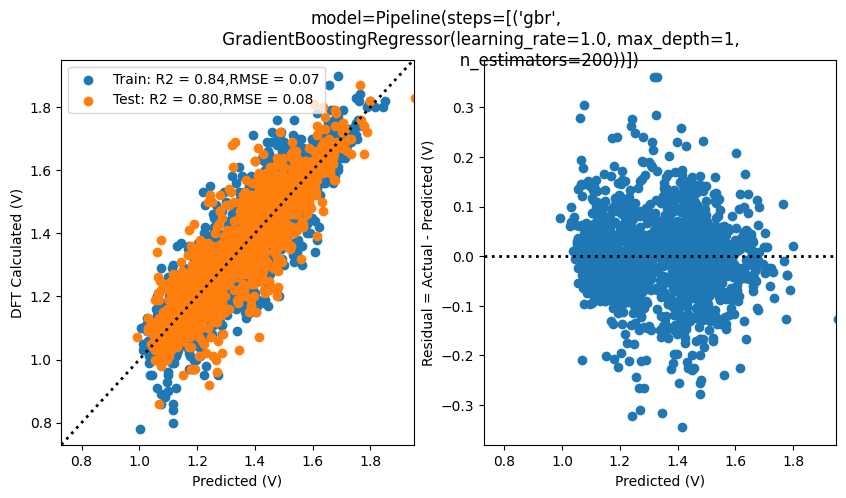

In [34]:
chemfun.pairity_plot(model=GBR_model,X_train=X_train,X_test=X_test,y_train=y_train["ERed"],y_test=y_test["ERed"])

4. NN

108/108 [==============================] - 0s 651us/step


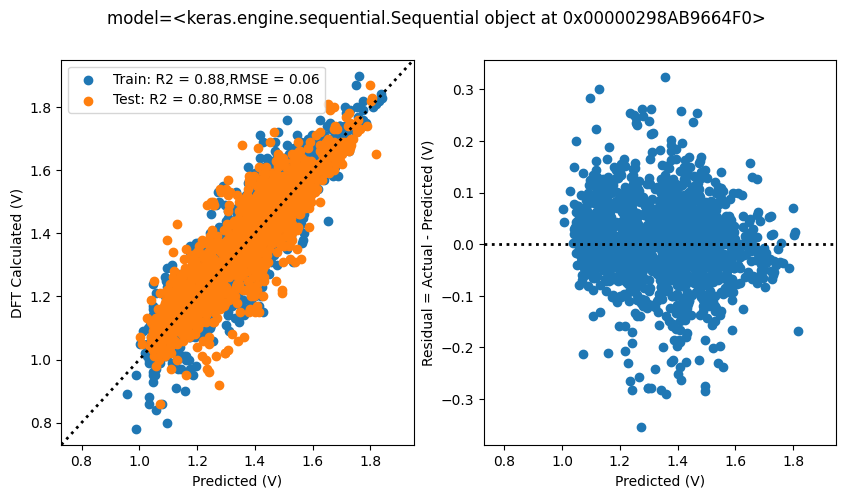

In [35]:
chemfun.pairity_plot2(model=NN_model,X_train=train_x,X_test=test_x,y_train=train_y["ERed"],y_test=y_test["ERed"])

5. NN with 10% dropout

108/108 [==============================] - 0s 671us/step


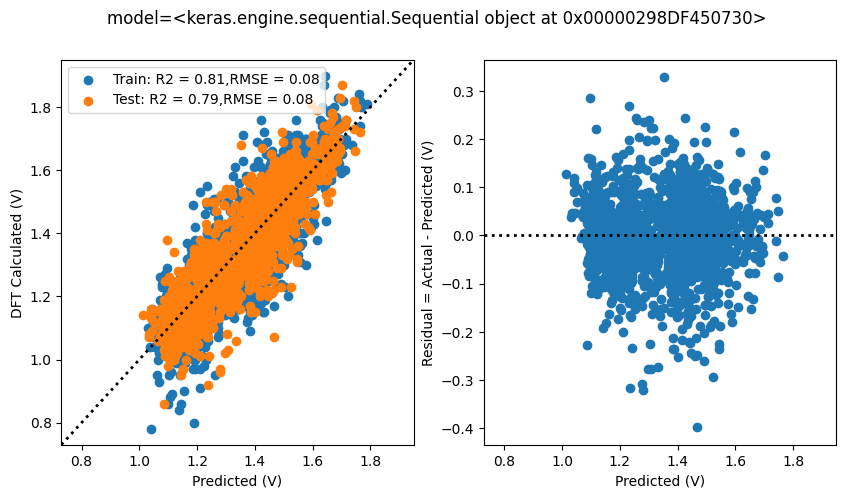

In [36]:
chemfun.pairity_plot2(model=NN_dp_model,X_train=train_x,X_test=test_x,y_train=train_y["ERed"],y_test=y_test["ERed"])